In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diamonds = sns.load_dataset("diamonds")

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Price distribution

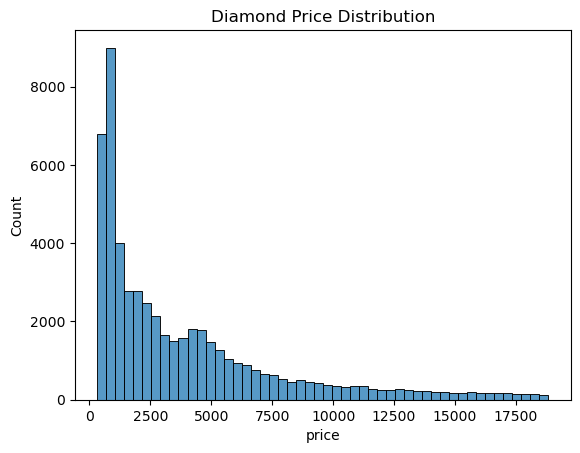

In [7]:
sns.histplot(diamonds["price"], bins=50)
plt.title("Diamond Price Distribution")
plt.show()

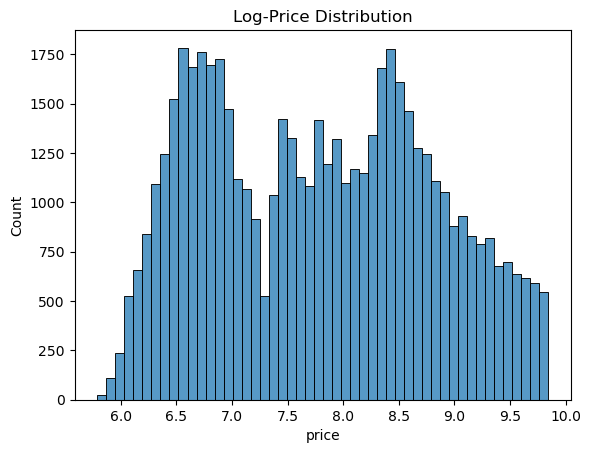

In [8]:
sns.histplot(np.log1p(diamonds["price"]), bins=50)
plt.title("Log-Price Distribution")
plt.show()

In [9]:
# Quantifying inequality: Gini of diamond prices

In [10]:
def gini_unweighted(x):
    x = np.asarray(x, dtype=float)
    x = x[x >= 0]
    x = np.sort(x)
    n = x.size
    if n == 0:
        return np.nan
    cumx = np.cumsum(x)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

gini_price = gini_unweighted(diamonds["price"])
gini_price

0.51011952909987

In [11]:
# Markets accept extreme inequality when valuing objects.

In [12]:
# Carat vs price (raw)

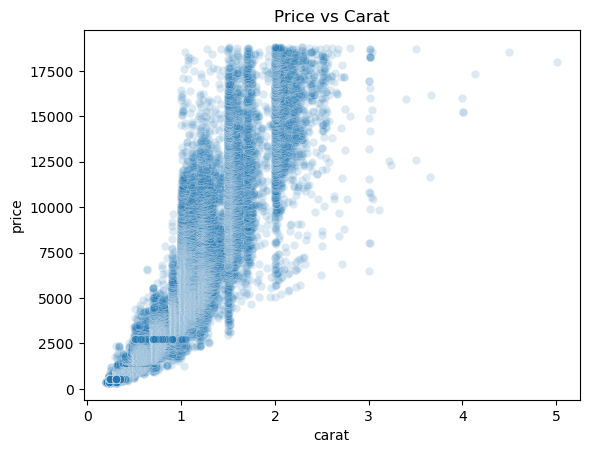

In [13]:
sns.scatterplot(
    data=diamonds,
    x="carat",
    y="price",
    alpha=0.15
)
plt.title("Price vs Carat")
plt.show()

In [14]:
# Log–log view

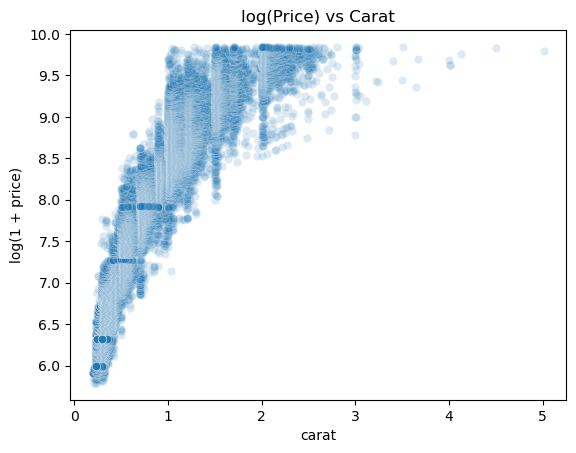

In [15]:
sns.scatterplot(
    data=diamonds,
    x="carat",
    y=np.log1p(diamonds["price"]),
    alpha=0.15
)
plt.title("log(Price) vs Carat")
plt.ylabel("log(1 + price)")
plt.show()

In [16]:
# Physical volume

In [17]:
# Carat ≠ volume exactly.
# compute volume explicitly.

In [18]:
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]
diamonds["volume"].describe()

count    53940.000000
mean       129.849403
std         78.245262
min          0.000000
25%         65.136830
50%        114.808572
75%        170.842451
max       3840.598060
Name: volume, dtype: float64

In [19]:
diamonds[diamonds["volume"] == 0].shape

(20, 11)

In [20]:
# Volume vs price

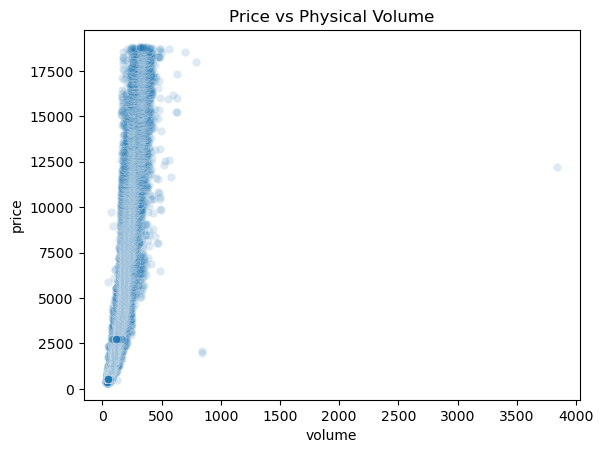

In [21]:
sns.scatterplot(
    data=diamonds[diamonds["volume"] > 0],
    x="volume",
    y="price",
    alpha=0.15
)
plt.title("Price vs Physical Volume")
plt.show()

In [22]:
# Volume vs price (log)

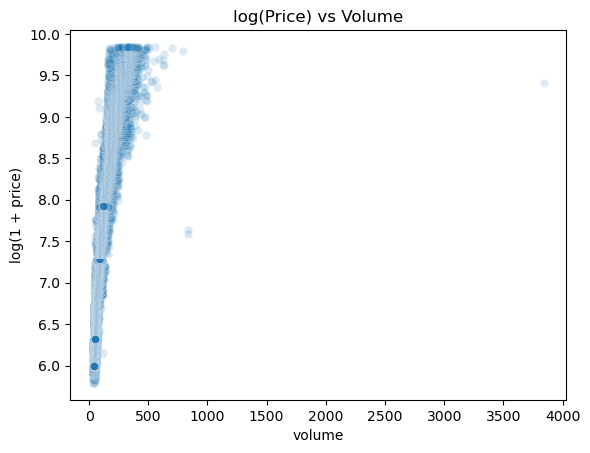

In [23]:
sns.scatterplot(
    data=diamonds[diamonds["volume"] > 0],
    x="volume",
    y=np.log1p(diamonds.loc[diamonds["volume"] > 0, "price"]),
    alpha=0.15
)
plt.title("log(Price) vs Volume")
plt.ylabel("log(1 + price)")
plt.show()

In [24]:
# Institutional valuation: cut, color, clarity
# Price by cut (violin)

/var/folders/zq/7ptd503177z6khbsfqhbyw780000gn/T/ipykernel_87185/3252578264.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


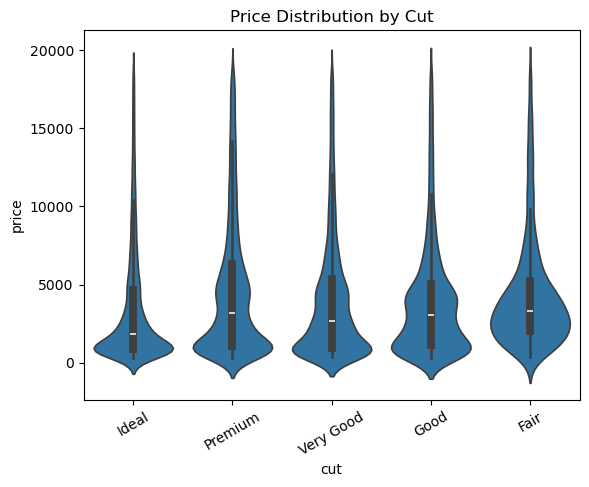

In [25]:
sns.violinplot(
    data=diamonds,
    x="cut",
    y="price",
    scale="width"
)
plt.title("Price Distribution by Cut")
plt.xticks(rotation=30)
plt.show()

In [26]:
# Price by color

/var/folders/zq/7ptd503177z6khbsfqhbyw780000gn/T/ipykernel_87185/2634553405.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


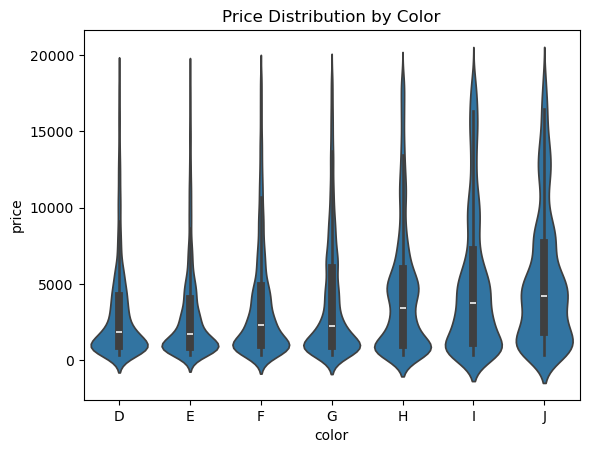

In [27]:
sns.violinplot(
    data=diamonds,
    x="color",
    y="price",
    scale="width"
)
plt.title("Price Distribution by Color")
plt.show()

In [28]:
# Price by clarity

/var/folders/zq/7ptd503177z6khbsfqhbyw780000gn/T/ipykernel_87185/1992317333.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


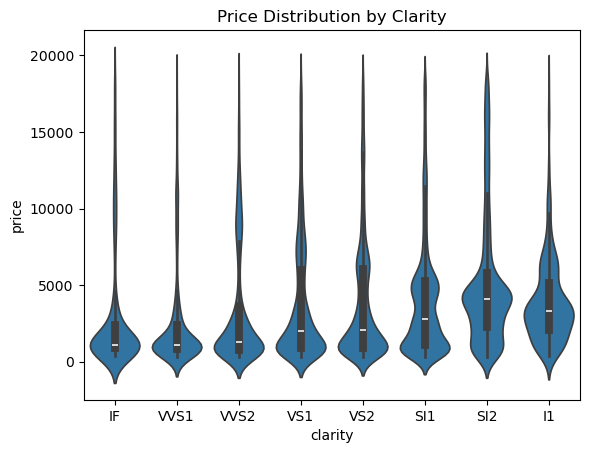

In [29]:
sns.violinplot(
    data=diamonds,
    x="clarity",
    y="price",
    scale="width"
)
plt.title("Price Distribution by Clarity")
plt.show()

In [30]:
# Multidimensional institutional view (heatmap)

# median price by cut × color

/var/folders/zq/7ptd503177z6khbsfqhbyw780000gn/T/ipykernel_87185/4066757561.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = diamonds.pivot_table(


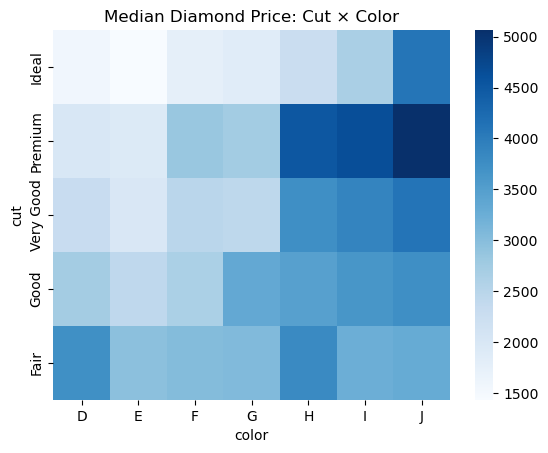

In [31]:
pivot = diamonds.pivot_table(
    index="cut",
    columns="color",
    values="price",
    aggfunc="median"
)

sns.heatmap(pivot, cmap="Blues")
plt.title("Median Diamond Price: Cut × Color")
plt.show()

#### Diamond prices exhibit extreme inequality, strong dependence on physical size, and remarkably consistent valuation patterns driven by institutional grading systems. 

#### Market valuation of diamonds is highly predictable, hierarchical, and standardized.

In [32]:
# Price per carat

In [33]:
diamonds["price_per_carat"] = diamonds["price"] / diamonds["carat"]

diamonds["price_per_carat"].describe()

count    53940.000000
mean      4008.394796
std       2012.665747
min       1051.162791
25%       2477.944444
50%       3495.198031
75%       4949.599702
max      17828.846154
Name: price_per_carat, dtype: float64

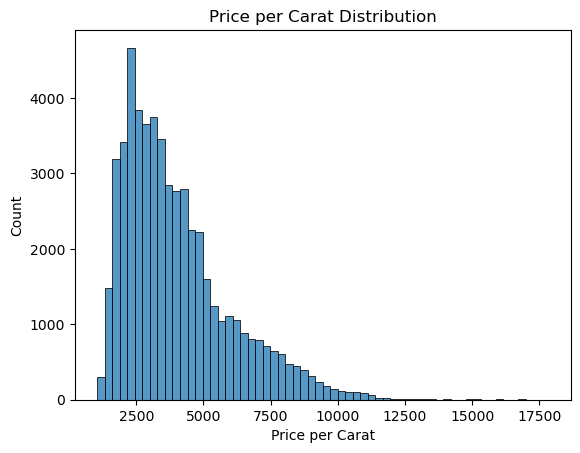

In [34]:
sns.histplot(diamonds["price_per_carat"], bins=60)
plt.title("Price per Carat Distribution")
plt.xlabel("Price per Carat")
plt.show()

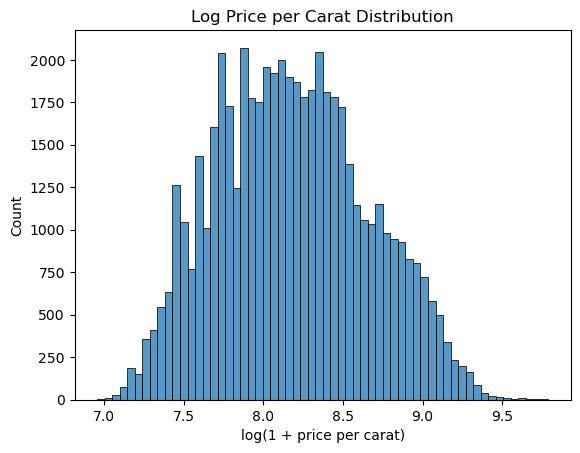

In [35]:
sns.histplot(np.log1p(diamonds["price_per_carat"]), bins=60)
plt.title("Log Price per Carat Distribution")
plt.xlabel("log(1 + price per carat)")
plt.show()

In [36]:
# Price per carat vs size

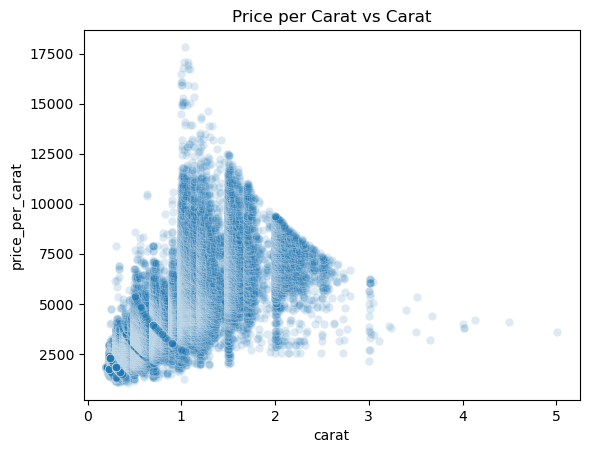

In [37]:
sns.scatterplot(
    data=diamonds,
    x="carat",
    y="price_per_carat",
    alpha=0.15
)
plt.title("Price per Carat vs Carat")
plt.show()

In [38]:
# Log-transform
diamonds["log_price"] = np.log1p(diamonds["price"])
diamonds["log_carat"] = np.log1p(diamonds["carat"])

# Simple linear fit
coef = np.polyfit(diamonds["log_carat"], diamonds["log_price"], deg=1)
coef

array([3.94916512, 5.59436   ])

In [39]:
# Residuals

In [40]:
diamonds["log_price_hat"] = coef[0] * diamonds["log_carat"] + coef[1]
diamonds["residual"] = diamonds["log_price"] - diamonds["log_price_hat"]

diamonds["residual"].describe()

count    5.394000e+04
mean     3.301629e-13
std      3.056003e-01
min     -2.877708e+00
25%     -1.879741e-01
50%      1.288266e-02
75%      1.909150e-01
max      1.417931e+00
Name: residual, dtype: float64

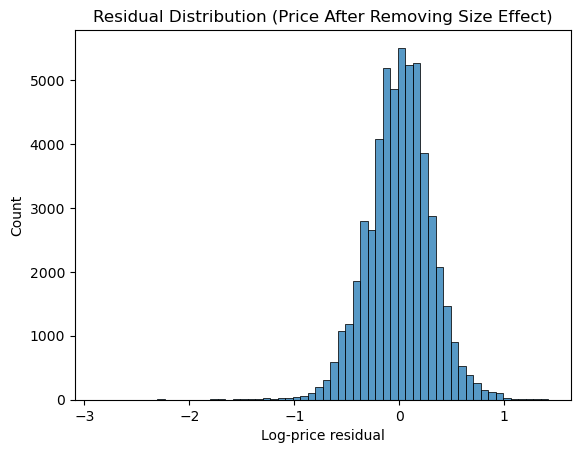

In [41]:
sns.histplot(diamonds["residual"], bins=60)
plt.title("Residual Distribution (Price After Removing Size Effect)")
plt.xlabel("Log-price residual")
plt.show()

In [42]:
# Residuals by cut

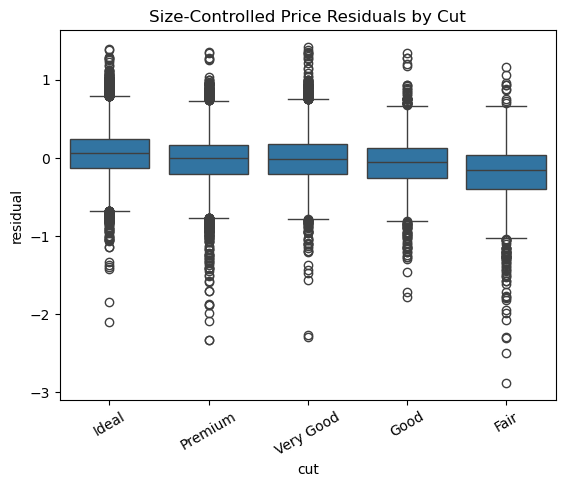

In [43]:
sns.boxplot(
    data=diamonds,
    x="cut",
    y="residual"
)
plt.title("Size-Controlled Price Residuals by Cut")
plt.xticks(rotation=30)
plt.show()

In [44]:
# Residuals by color

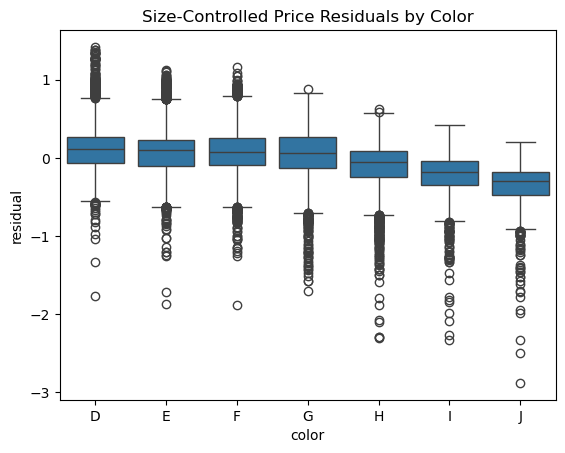

In [45]:
sns.boxplot(
    data=diamonds,
    x="color",
    y="residual"
)
plt.title("Size-Controlled Price Residuals by Color")
plt.show()

In [46]:
# Residuals by clarity

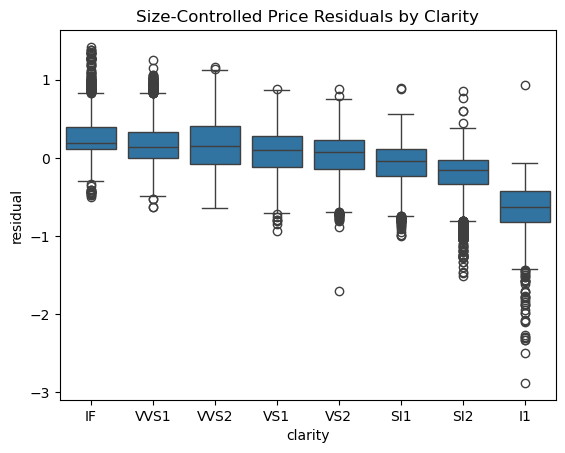

In [47]:
sns.boxplot(
    data=diamonds,
    x="clarity",
    y="residual"
)
plt.title("Size-Controlled Price Residuals by Clarity")
plt.show()

In [48]:
# median residual by cut × clarity

/var/folders/zq/7ptd503177z6khbsfqhbyw780000gn/T/ipykernel_87185/928961510.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = diamonds.pivot_table(


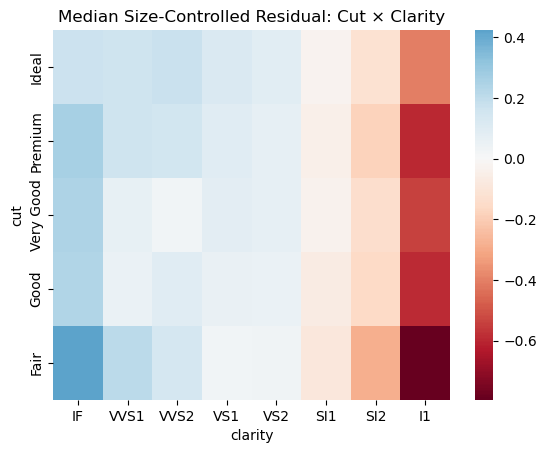

In [49]:
pivot = diamonds.pivot_table(
    index="cut",
    columns="clarity",
    values="residual",
    aggfunc="median"
)

sns.heatmap(pivot, cmap="RdBu", center=0)
plt.title("Median Size-Controlled Residual: Cut × Clarity")
plt.show()

#### After controlling for physical size, diamond prices still vary systematically by cut, color, and clarity. 

#### These residual patterns are smooth, hierarchical, and consistent across the market, indicating strong institutional coordination in valuation.

#### Object valuation in the diamond market remains highly ordered even after removing physical constraints.